# Class 7: Combining datasets

&nbsp;  
**Welcome to class 7!** Today we're going to revisit pandas and practice combining datasets. There are many instances in which this might be necessary: adding gene expression data from multiple RNASeq experiments, joining protein annotations and structural data, or adding species taxonomies to distribution dats for example.

There are three main ways that we can do this in pandas: concatenating (`concat()`), merging (`merge()`) and joining (`join()`), and we'll work through all of these in turn.

Before we dive in, let's go over some vocabulary. If we have two dataframes with some information in common, then:

 - an **outer join** outputs all the information from both dataframes together
 - an **inner join** outputs just the information both dataframes have in common
 - a **left** or **right join** outputs the information from one of the dataframes, plus the overlap

<div>
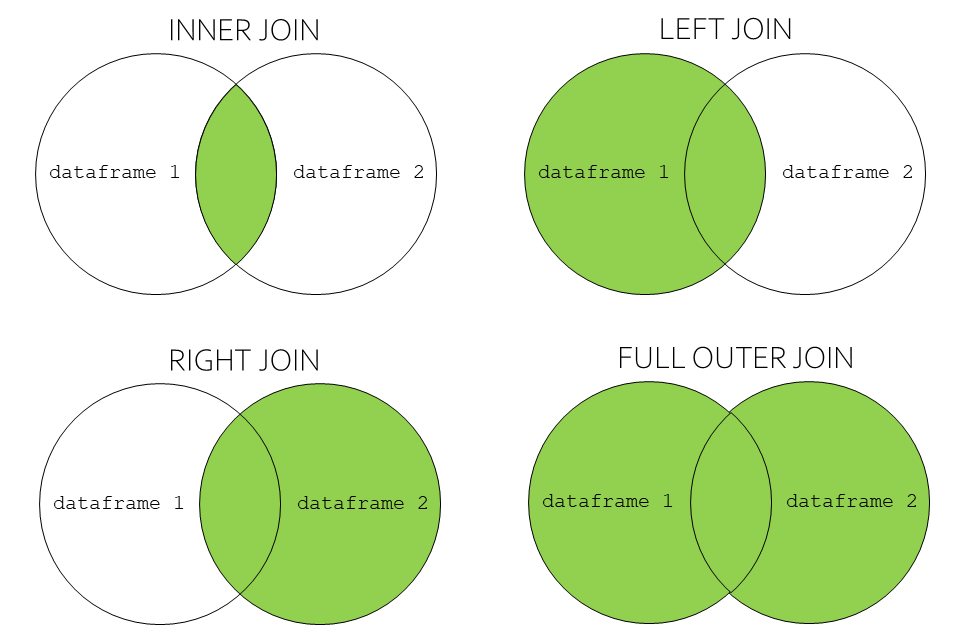
</div>

## Load the modules

First, let's import pandas.

In [ ]:
import pandas as pd

## Concatenating (`concat()`)

`concat()` is used to append one (or more) dataframes one below the other (or next to each other, depending on whether the axis option is set to 0 or 1). The function takes the form `pd.concat([dataframes], axis, join, keys...)`.

- `[dataframes]` is the list of dataframes you want to concatenate.
- `axis` specifies the axis to concatenate along.
- `join` is the type of join (inner or outer). The default for `pd.concat()` is outer.
- `keys` allows you to add labels to the resulting dataframe so you can determine where the data came from.

<div class="alert alert-block alert-info">
<b>Remember:</b> axis tells Python in which direction to perform the operation. axis = 1 tells Python to perform the operation by moving across the columns. axis = 0 tells Python to perform the operation by moving down the rows.
    
    | Column A | Column B |
    -----------------------
    | 0.626386 | 1.523251 |---- axis = 1 ----->
    ----------------------- 
         |         
         | axis = 0  
         ↓         
</div>

Let's see how this all works.

&nbsp;  
<div>
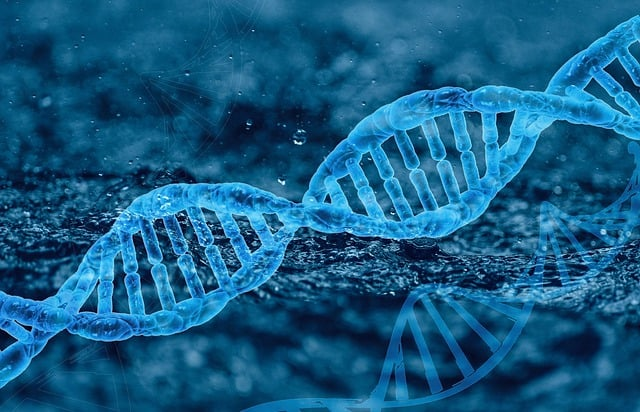
</div>
&nbsp;  

In the cells below, read in Infected.csv and Control.csv from the Datasets folder. Call them 'infected' and 'control' respectively.

Let's have a look at them.

In [ ]:
infected

In [ ]:
control

First, we'll append control under infected.

In [ ]:
df = pd.concat([infected, control], axis = 0)
df

Now rewrite the code above but use `axis = 1`. What happens?

It is often useful to add a label to our data, so that we know which dataset it originated from. We can do this using `keys`.

In [ ]:
df = pd.concat([infected, control], keys = ["infected", "control"], axis = 0)
df

Try this again, but use `axis = 1`. See how the labels have been added this time.

The dataframes we have created by concatenating infected and control aren't particularly useful. You can see how, in the dataframe above, we have different transcripts on the same row. This is because `concat()` joins dataframes together based on index number. In this case, it would make much more sense to join the datasets together based on 'Transcript'. To do this, we need to make 'Transcript' the index. 

We can tell Python to use a particular column as the index with the code `df.set_index('COLUMN_NAME')`.

In [ ]:
df = pd.concat([infected.set_index('Transcript'), control.set_index('Transcript')], keys = ["infected", "control"], axis = 1)
df

The data for each transcript are now in the same row!

Let's now explore another type of join. The default for `concat()` is an outer join, so the datasets are joined together in their entirety. Run the code below, and have a look at the output of an **inner** join. How is it different to the output above?

In [ ]:
df = pd.concat([infected.set_index('Transcript'), control.set_index('Transcript')], join = 'inner',
               keys = ["infected", "control"], axis = 1)
df

## Merging (`merge()`)

Typically, merging is used to combine two dataframes that share a common column, and is probably the most flexible of the three methods. It takes the form `dataframe1.merge(dataframe2, how, on, suffixes...`).

- `dataframe1` is the name of the first dataframe.
- `dataframe2` is the name of the second dataframe.
- `how` specifies the type of join. The default is 'inner'.
- `on` is the name of the column to join on.
- `suffixes` are the labels you can add to the data indicating which dataframe it originated from.

Let's apply it to the infected and control datasets. We'll merge them on their common column 'Transcript'.

In [ ]:
df = infected.merge(control, how = 'outer', on = 'Transcript', suffixes = ['_Infected', '_Control'])
df

It is possible to perform outer, inner, left and right joins with `merge()`. Run the code below to perform an inner join. Then try it again with a left and then a right join. Look at the output to see what each of these are doing.

In [ ]:
df = infected.merge(control, how = 'inner', on = 'Transcript', suffixes = ['_Infected', '_Control'])
df

A really handy feature of `merge()` is that you can join two datasets on a common column, even if the names of those columns differ.

Read in Location.csv and anot.csv from the Datasets folder. Call them 'location' and 'anot' respectively. Print them out so you know what they look like.

The 'Locus' column of location contains the same information as the 'Gene' column of anot. To merge these together, we need to add `left_on = ` and `right_on` into our code. 'Left' refers to dataframe1 and 'right' refers to dataframe2.

In [ ]:
df = location.merge(anot, left_on = 'Locus', right_on = 'Gene')
df

Note how pandas has dealt with the two columns called 'Locus' which contain different information.

### Chaining `merge()` commands

Pandas also allows you to **chain** multiple `merge()` commands. This allows you to write multiple commands in a single line, resulting in cleaner and more readable code:

    `df = dataframe1.merge().merge()`.... etc

Let's merge infected and control, then merge the output dataframe with location.

In [ ]:
df = infected.merge(control, on = 'Transcript').merge(location, left_on = 'Transcript', right_on = 'Locus')
df

Now try merging infected with control, then with location and then with anot.

## Joining (`join()`)

By default, `join()` joins datasets together on indexes, and takes the form `dataframe1.join(dataframe2, how, lsuffix, rsuffix...`).

- `dataframe1` is the name of the first dataframe.
- `dataframe2` is the name of the second dataframe.
- `how` specifies the type of join. The default is 'left'.
- `lsuffix` is the label attached to the data from the left dataframe (dataframe1).
- `rsuffix` is the label attached to the data from the right dataframe (dataframe2).

Let's apply it to the infected and control datasets.

In [ ]:
df = infected.join(control, lsuffix = '_Infected', rsuffix = '_Control')
df

Once again, we have data from different transcripts in the same row. To fix this, we can use the same technique we used with `concat()` and make the common column 'Transcript' the index of both datasets. Edit the code above by adding `.set_index('Transcript')` to each dataset, and look at the resulting dataframe. The two dataframes should now be aligned so that data from the same transcript appear in the same row.

## A bit more practice

We'll return to the Greenland chick data from week 2, and add in some climate data collected from the nesting sites.

Read in Greenland_nests.csv and Greenland_climate.csv from the Datasets folder. Call them nests and climate respectively. Check to see they have loaded in correctly.

Have a look at each dataset. You'll notice that they don't quite overlap - we have chick data but no climate data for Disko Bay and climate data but no chick data for Ilulissat.

Identify the 'common column' between the two datasets, then use `merge()` to join them together.

Drop the 'Town' column and any rows containing missing values (hint: look back at classes 2 and 3 if you need some help with this). Then check to see everything looks as you would expect.

## If you have time in class, or for homework...

Read in surveys.csv and species.csv from the Datasets folder. These data contain a record of the animal species observed during a long-term study of a desert ecosystem in Arizona (S. K. Morgan Ernest *et al*. 2009. Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA. Ecology 90:1708.).

&nbsp;  
<div>
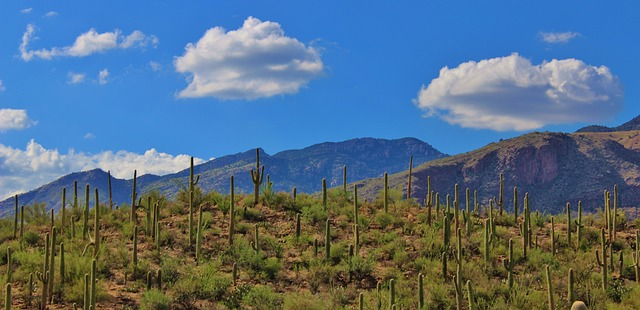
</div>
&nbsp;  

Use `surveys.head()` and `species.head()` to identify the common column.

Merge these two datasets together so that you end up with a dataframe that contains the survey results as well as the genus, species and taxa.

### Some pandas revision

With the resulting dataset...

- drop the species_id column
- add a new column called 'fullname' that concatenates the genus and species columns (with a space in between)
- sort the dataframe by record_id in descending order
- find the minimum, maximum and mean of hindfoot_length
- count the number of occurrences of each genus (hint: use value_counts())